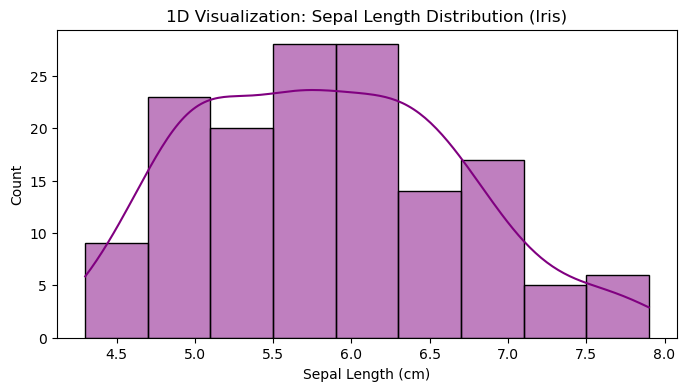

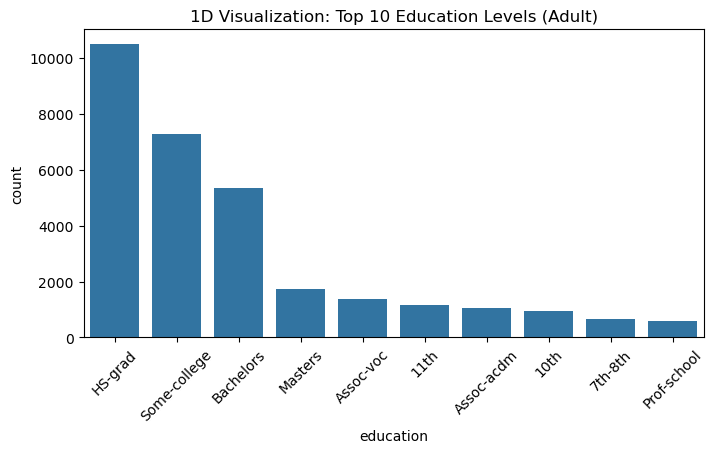

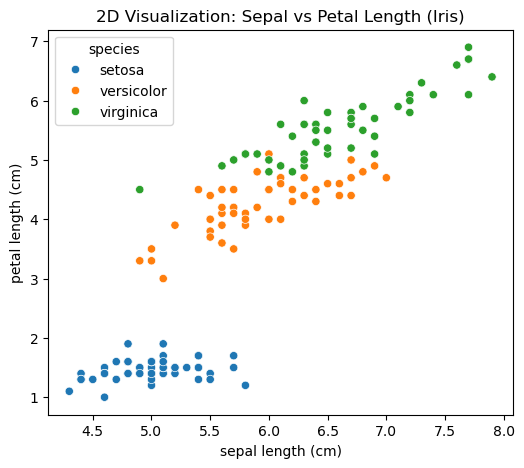

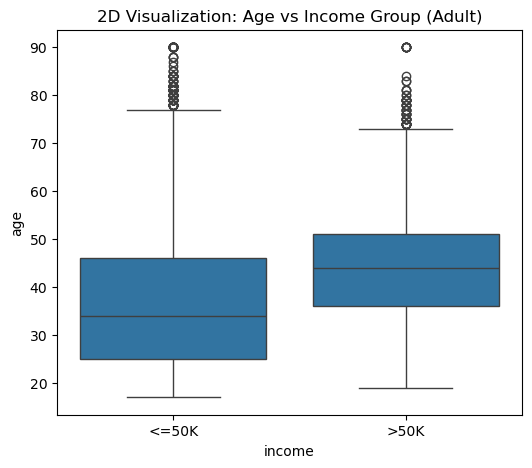

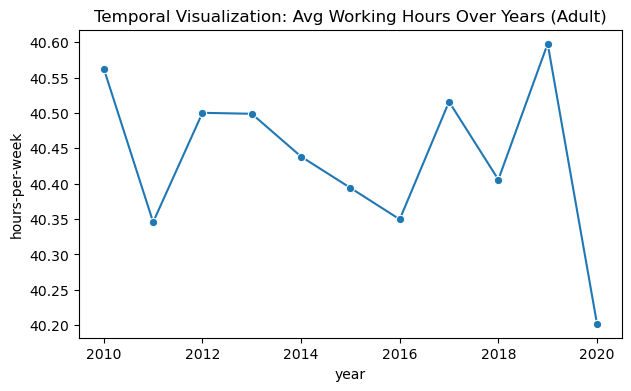

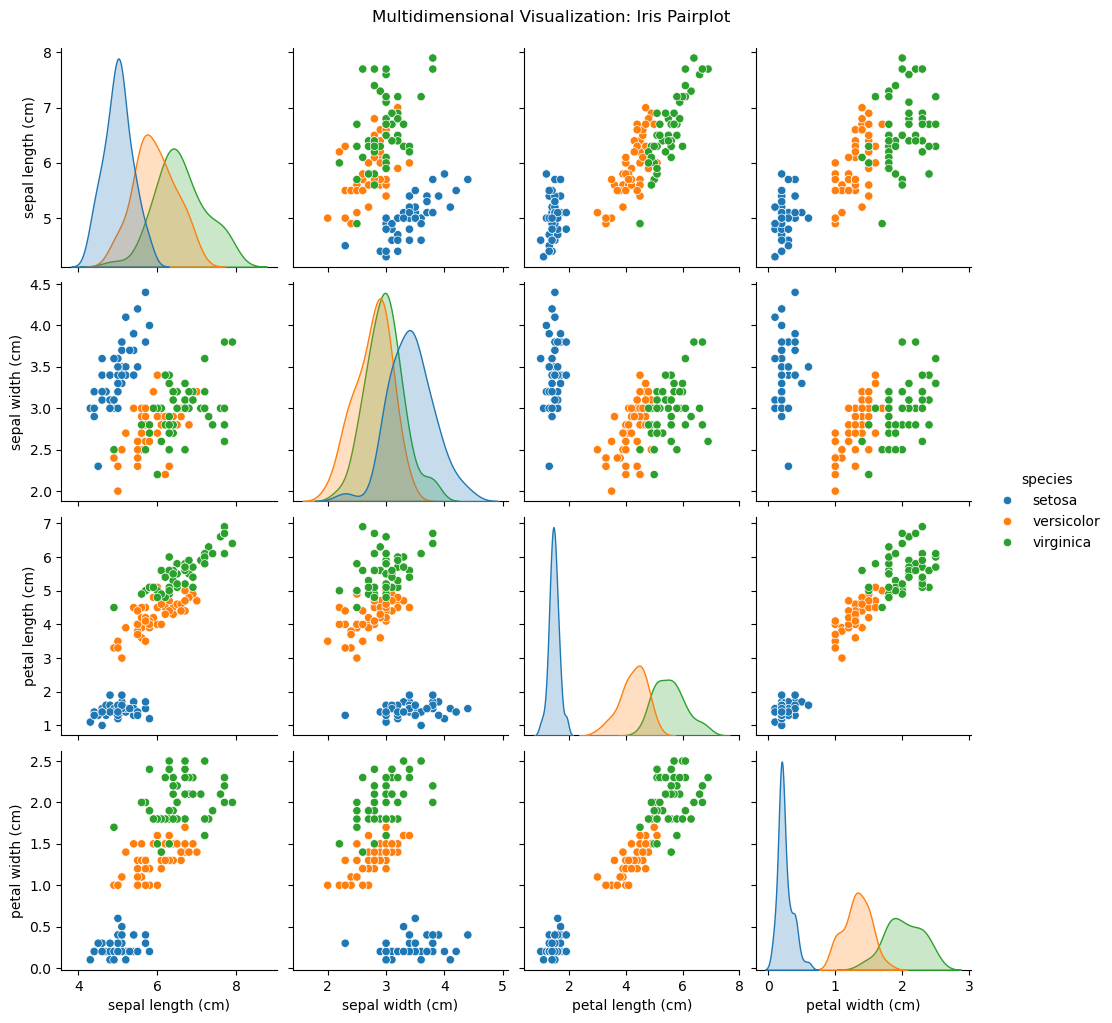

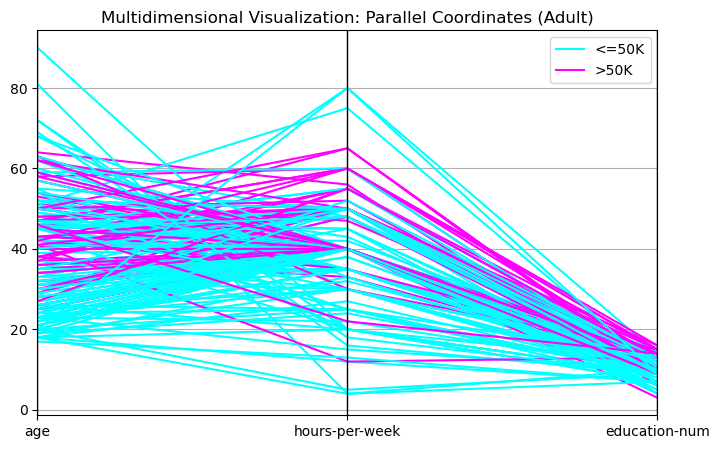

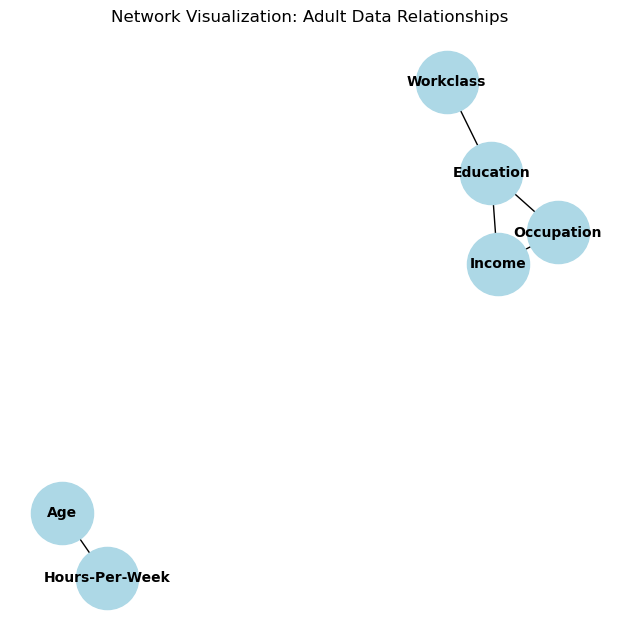


✅ All visualizations completed successfully!


In [ ]:

                            # Experiment No: 04

#  Perform the following data visualization operations 
# using Tableau on Adult and Iris datasets. 
# a. 1D (Liner) Data Visualization
#  b. 2D (Planar) Data Visualization    
# c. 3D (Volumetric)  Data Visualization
#  d. Temporal  Data Visualization
#  e. Multidimensional  Data Visualization
#  f. Tree / Hierarchical  Data Visualization
#  g. Network  Data Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import networkx as nx
from pandas.plotting import parallel_coordinates
from sklearn.datasets import load_iris

adult_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult_columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
adult = pd.read_csv(adult_url, header=None, names=adult_columns, na_values=' ?', skipinitialspace=True)

iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

plt.figure(figsize=(8,4))
sns.histplot(iris['sepal length (cm)'], kde=True, color='purple')
plt.title('1D Visualization: Sepal Length Distribution (Iris)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='education', data=adult, order=adult['education'].value_counts().index[:10])
plt.title('1D Visualization: Top 10 Education Levels (Adult)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=iris)
plt.title('2D Visualization: Sepal vs Petal Length (Iris)')
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x='income', y='age', data=adult)
plt.title('2D Visualization: Age vs Income Group (Adult)')
plt.show()

fig = px.scatter_3d(
    iris,
    x='sepal length (cm)',
    y='sepal width (cm)',
    z='petal length (cm)',
    color='species',
    title="3D Visualization: Iris Flower Data"
)
fig.show()

adult['year'] = np.random.randint(2010, 2021, size=len(adult))
time_df = adult.groupby('year')['hours-per-week'].mean().reset_index()
plt.figure(figsize=(7,4))
sns.lineplot(x='year', y='hours-per-week', data=time_df, marker='o')
plt.title('Temporal Visualization: Avg Working Hours Over Years (Adult)')
plt.show()

sns.pairplot(iris, hue='species')
plt.suptitle("Multidimensional Visualization: Iris Pairplot", y=1.02)
plt.show()

cols = ['age', 'hours-per-week', 'education-num', 'income']
plt.figure(figsize=(8,5))
parallel_coordinates(adult[cols].dropna().sample(200, random_state=42), 'income', colormap='cool')
plt.title('Multidimensional Visualization: Parallel Coordinates (Adult)')
plt.show()

fig = px.treemap(
    adult.dropna(subset=['workclass', 'education', 'occupation']),
    path=['workclass', 'education', 'occupation'],
    values='hours-per-week',
    color='education-num',
    title='Hierarchical Visualization: Workclass → Education → Occupation'
)
fig.show()

G = nx.Graph()
edges = [
    ('Education', 'Income'),
    ('Occupation', 'Income'),
    ('Age', 'Hours-Per-Week'),
    ('Workclass', 'Education'),
    ('Education', 'Occupation')
]
G.add_edges_from(edges)
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Network Visualization: Adult Data Relationships")
plt.show()

print("\n✅ All visualizations completed successfully!")



🔹 Dataset Loaded Successfully!

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  

📊 Model Comparison:

                      Model  R2 Score    RMSE
0         Linear Regression    0.8212  0.0679
1             Decision Tree    0.6331  0.0973
2             Random Forest    0.8079  0.0704
3  Support Vector Regressor    0.7598  0.0788
4         Gradient Boosting    0.7958  0.0726


C:\Users\badar\AppData\Local\Temp\ipykernel_17784\2753103519.py:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




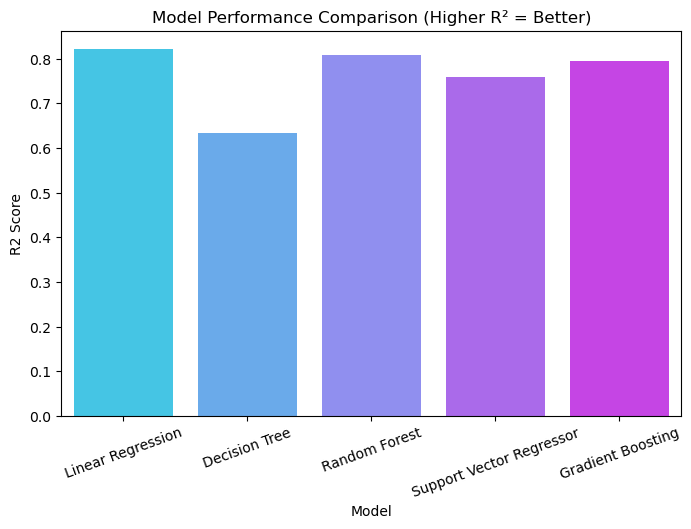

c:\Users\badar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names




🎯 Predicted Chance of Admission: 93.25%


In [ ]:
                        
                            # Experiment No: 05


#  Develop a mini project in a group using different 
# predictive models techniques to solve any real life 
# problem.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

url = "C:\\Users\\badar\\OneDrive\\Desktop\\US_graduate_schools_admission_parameters_dataset.csv"
df = pd.read_csv(url)
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

print("\n🔹 Dataset Loaded Successfully!\n")
print(df.head())

X = df.drop(['Serial No.', 'Chance of Admit'], axis=1)
y = df['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append([name, round(r2, 4), round(rmse, 4)])

results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'RMSE'])
print("\n📊 Model Comparison:\n")
print(results_df)

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2 Score', data=results_df, palette='cool')
plt.title('Model Performance Comparison (Higher R² = Better)')
plt.xticks(rotation=20)
plt.show()

sample = np.array([[330, 115, 5, 4.5, 4.5, 9.5, 1]]).reshape(1, -1)
sample_scaled = scaler.transform(sample)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
pred = best_model.predict(sample_scaled)
print(f"\n🎯 Predicted Chance of Admission: {pred[0]*100:.2f}%")


In [5]:
# Experiment No: 02 - Log System Analysis using MapReduce (Python Simulation)
from datetime import datetime, timedelta
from collections import defaultdict
import random

def gen_logs(path, n=5, s=15):
    users = [f"user{i}" for i in range(1, n+1)]
    start = datetime(2025, 11, 9, 8, 0, 0)
    logs = []
    for _ in range(s):
        u = random.choice(users)
        login = start + timedelta(minutes=random.randint(0, 180))
        logout = login + timedelta(minutes=random.randint(15, 120))
        logs += [f"{login:%Y-%m-%d %H:%M:%S} {u} LOGIN", f"{logout:%Y-%m-%d %H:%M:%S} {u} LOGOUT"]
    open(path, "w").write("\n".join(sorted(logs)))

def hms(sec):
    h, sec = divmod(sec, 3600); m, s = divmod(sec, 60)
    return f"{h:02}:{m:02}:{s:02}"

def analyze(path):
    sessions, total = defaultdict(list), defaultdict(int)
    for line in open(path):
        parts = line.strip().split()
        ts = datetime.strptime(" ".join(parts[:2]), "%Y-%m-%d %H:%M:%S")
        user, action = parts[2], parts[3].upper()
        if action == "LOGIN": sessions[user].append(ts)
        elif action == "LOGOUT" and sessions[user]:
            dur = (ts - sessions[user].pop()).total_seconds()
            total[user] += int(dur)
    result = sorted(total.items(), key=lambda x: x[1], reverse=True)
    print("User,TotalSeconds,HH:MM:SS")
    for u, t in result: print(f"{u},{t},{hms(t)}")
    if result: print(f"\nTopUser={result[0][0]} | Total={hms(result[0][1])}")

path = r"C:\Users\badar\OneDrive\Desktop\logs.txt"
gen_logs(path)
analyze(path)


User,TotalSeconds,HH:MM:SS
user5,22980,06:23:00
user3,15180,04:13:00
user4,12060,03:21:00
user1,11760,03:16:00
user2,3120,00:52:00

TopUser=user5 | Total=06:23:00


In [3]:
# Experiment No: 03 - Forest Fire Data Analysis (Simulating Hadoop & Hive)
import pandas as pd, numpy as np, sqlite3
from itertools import groupby

# Load data
try:
    df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
except:
    df = pd.DataFrame({
        "month":["mar","oct","oct","mar","aug","sep","sep"],
        "day":["fri","tue","sat","sun","sun","sat","sun"],
        "temp":[8.2,18,14.6,11.4,22.2,24.1,25.5],
        "wind":[6.7,0.9,1.3,4,5.4,2.7,4],
        "RH":[51,33,35,66,44,35,41],
        "rain":[0,0,0,0,0,0,0],
        "area":[0,0,0,0,1.23,12.3,0.5]
    })

# MapReduce simulation
def mr(data, mapper, reducer):
    pairs = [(k, v) for d in data for k, v in mapper(d)]
    pairs.sort(key=lambda x: x[0])
    return [(k, reducer([v for _, v in g])) for k, g in groupby(pairs, key=lambda x: x[0])]

rows = df.to_dict("records")
fires = mr(rows, lambda r: [(r["month"], 1)], sum)
areas = mr(rows, lambda r: [(r["month"], r["area"])],
           lambda v: {"fires": len(v), "avg": np.mean(v), "max": np.max(v)})
envs = mr(rows, lambda r: [(r["month"], (r["temp"], r["wind"], r["RH"]))],
          lambda v: dict(temp=np.mean([x[0] for x in v]),
                        wind=np.mean([x[1] for x in v]),
                        RH=np.mean([x[2] for x in v])))

print("\n[MapReduce] Fires per Month\n", pd.DataFrame(fires, columns=["month", "fires"]))
print("\n[MapReduce] Area Stats\n", pd.DataFrame([{**{"month": m}, **v} for m, v in areas]))
print("\n[MapReduce] Environmental Means\n", pd.DataFrame([{**{"month": m}, **v} for m, v in envs]))

# Hive-like SQL
con = sqlite3.connect(":memory:")
df.to_sql("fires", con, index=False, if_exists="replace")
print("\n[SQL] Monthly Summary\n", pd.read_sql("SELECT month, COUNT(*) fires, AVG(area) avg_area, MAX(area) max_area FROM fires GROUP BY month", con))
print("\n[SQL] Temp Buckets\n", pd.read_sql("SELECT CASE WHEN temp<10 THEN '<10' WHEN temp<20 THEN '10-20' WHEN temp<30 THEN '20-30' ELSE '>=30' END bucket, COUNT(*) fires, AVG(area) avg_area FROM fires GROUP BY bucket", con))
print("\n[SQL] Rain Analysis\n", pd.read_sql("SELECT month, COUNT(*) fires_with_rain FROM fires WHERE rain>0 GROUP BY month", con))



[MapReduce] Fires per Month
    month  fires
0    apr      9
1    aug    184
2    dec      9
3    feb     20
4    jan      2
5    jul     32
6    jun     17
7    mar     54
8    may      2
9    nov      1
10   oct     15
11   sep    172

[MapReduce] Area Stats
    month  fires        avg      max
0    apr      9   8.891111    61.13
1    aug    184  12.489076   746.28
2    dec      9  13.330000    24.77
3    feb     20   6.275000    51.78
4    jan      2   0.000000     0.00
5    jul     32  14.369687   278.53
6    jun     17   5.841176    70.32
7    mar     54   4.356667    36.85
8    may      2  19.240000    38.48
9    nov      1   0.000000     0.00
10   oct     15   6.638000    49.37
11   sep    172  17.942616  1090.84

[MapReduce] Environmental Means
    month       temp      wind         RH
0    apr  12.044444  4.666667  46.888889
1    aug  21.631522  4.086413  45.489130
2    dec   4.522222  7.644444  38.444444
3    feb   9.635000  3.755000  55.700000
4    jan   5.250000  2.000000 